Author: Thibeau Wouters

# Physical Modelling of Complex Systems: Assignment 6

##### Import packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
#import scipy as scipy
#from scipy.special import binom
#import pandas as pd
#import random

# Import some Sympy functions to solve for xi
from sympy.solvers import solve
from sympy import Symbol, N
X = Symbol('X', real = True)

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
     "legend.fontsize":24,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

## 6.2 - The Rössler system

In [3]:
def x_dot(x, y, z):
    return - y - z

In [4]:
def y_dot(x, y, z, a = 0.2):
    return x + a*y

In [6]:
def z_dot(x, y, z, c, b = 0.2):
    return b + z*(x - c)

In [35]:
def solve_Rossler(t_vals, initial, c, a = 0.2, b = 0.2):
    '''Solves Goodwin model numerically. Assume t_vals is list of times, equally spaced from each other.'''
    
    # Create empty list to save calculated values, and save initial conditions
    x_vals = []; y_vals = []; z_vals = []
    x0 = initial[0]; y0 = initial[1]; z0 = initial[2];
    
    # Get the value of Delta t for calculations
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]:
            # Initial condition
            x_vals.append(x0); y_vals.append(y0); z_vals.append(z0)
            
        else:
            # Compute next value: discretised derivative
            x_val = x_vals[-1] + x_dot(x_vals[-1], y_vals[-1], z_vals[-1])*DeltaT
            y_val = y_vals[-1] + y_dot(x_vals[-1], y_vals[-1], z_vals[-1], a)*DeltaT
            z_val = z_vals[-1] + z_dot(x_vals[-1], y_vals[-1], z_vals[-1], c, b)*DeltaT
            
            # Add to list
            x_vals.append(x_val); y_vals.append(y_val);  z_vals.append(z_val)
            
    return (x_vals, y_vals, z_vals)

Define the values of $c$ we want to explore: since I want to create a 3 x 3 plot, please give 9 values for $c$.

In [58]:
c_vals = [4, 6, 8, 9, 11, 12, 13, 18, 20]
initial = (8, 8, 8)

$ \textbf{Phase space plots} $

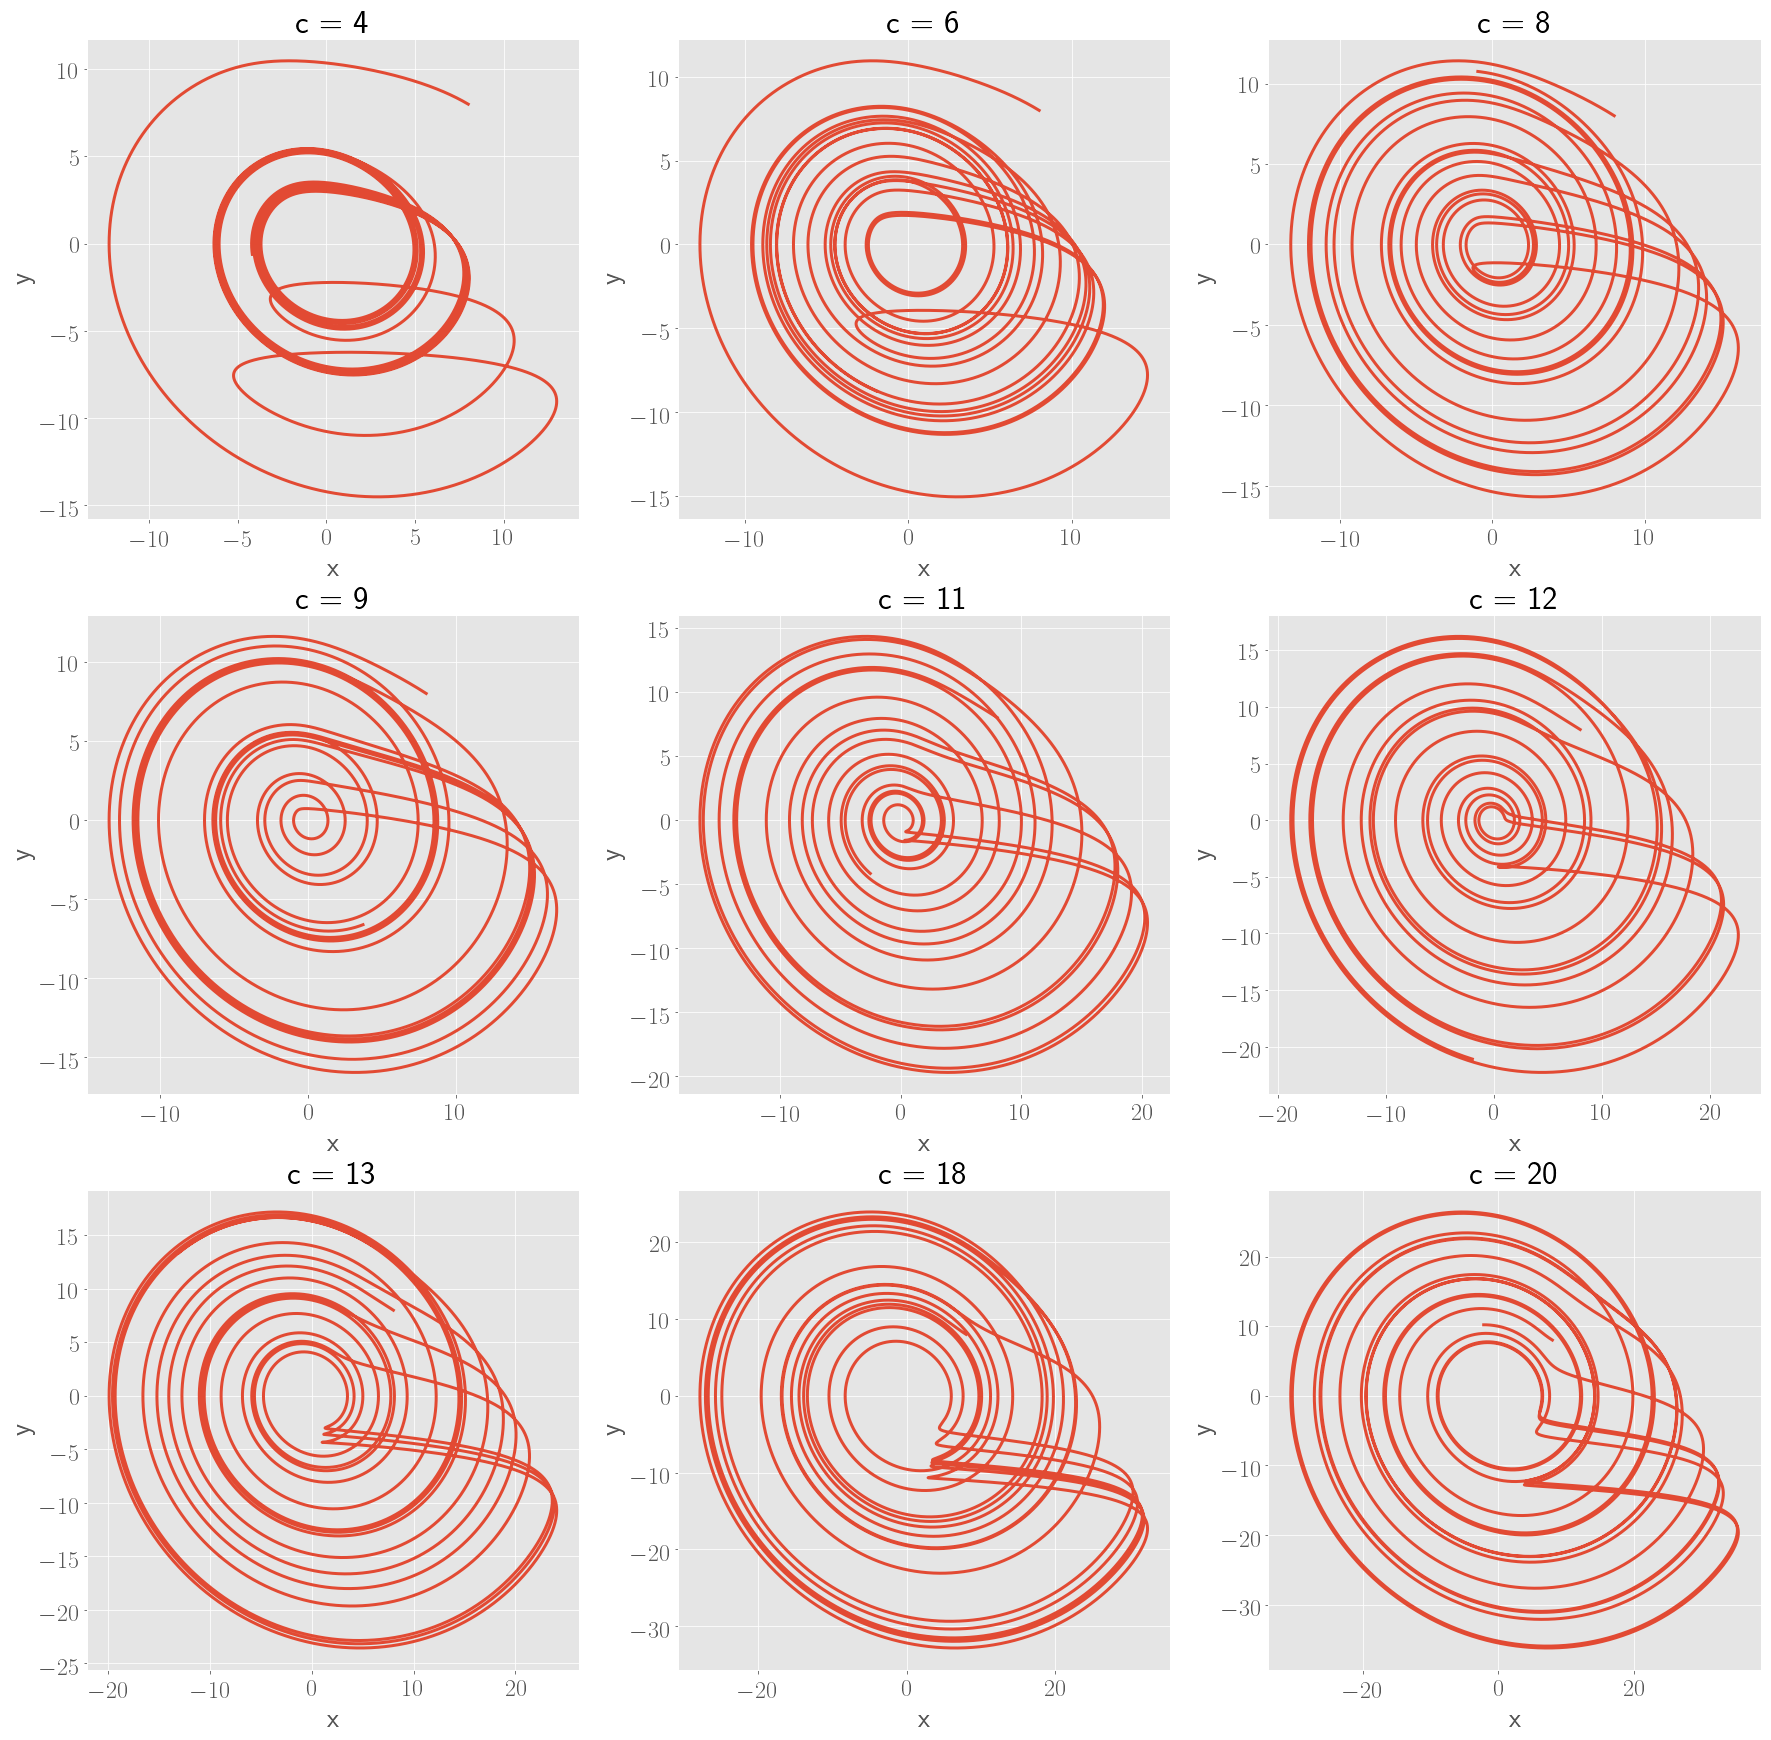

In [59]:
fig, axs = plt.subplots(3, 3, figsize = (30, 30))

t_vals = np.arange(0, 100, 0.0001)

title_list = ['c = %d' % c for c in c_vals]

for i in range(len(c_vals)):
    ax = axs[i//3, i%3]
    x, y, z = solve_Rossler(t_vals, initial, c_vals[i])
    
    ax.plot(x, y, label = c_vals[i])
    ax.set_title(title_list[i], fontsize = 33)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
plt.savefig('rossler_phase_plots.pdf', bbox_inches = 'tight')
plt.show()

$ \textbf{Time series} $

In [ ]:
plt.figure(figsize = (12, 10))

t_vals = np.arange(0, 10, 0.0001)

for c in c_vals:
    x, y, z = solve_Rossler(t_vals, initial, c)
    plt.plot(t_vals, x, label = c)

plt.legend()
plt.show()